In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df_index = pd.read_csv("/content/economic_data.csv")

In [ ]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.25,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [ ]:
# drop unneccessary columns
df_index.drop(columns=["year", "month"], axis=1, inplace=True)

In [ ]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.25,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
## check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

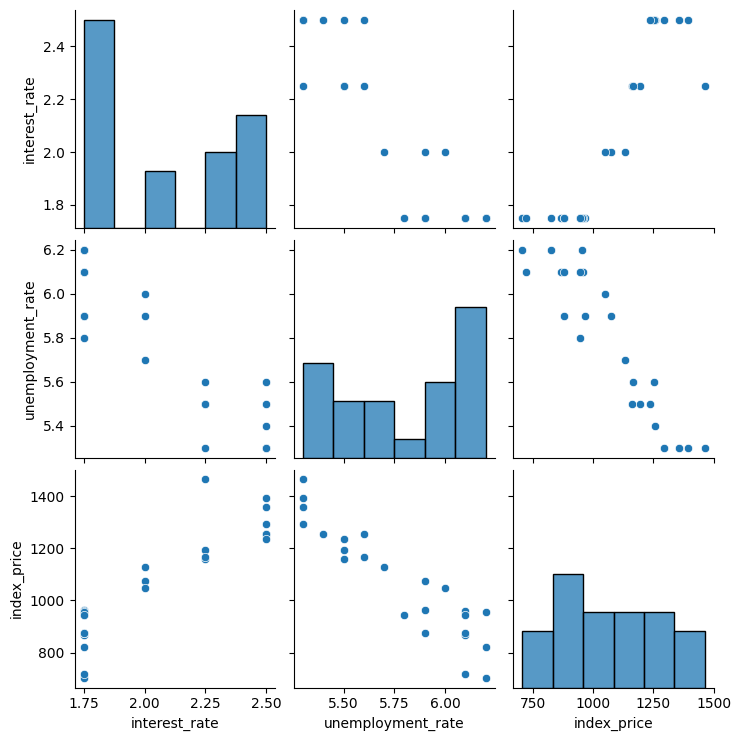

In [ ]:
## Lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [ ]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.910146,0.894104
unemployment_rate,-0.910146,1.000000,-0.925741
index_price,0.894104,-0.925741,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

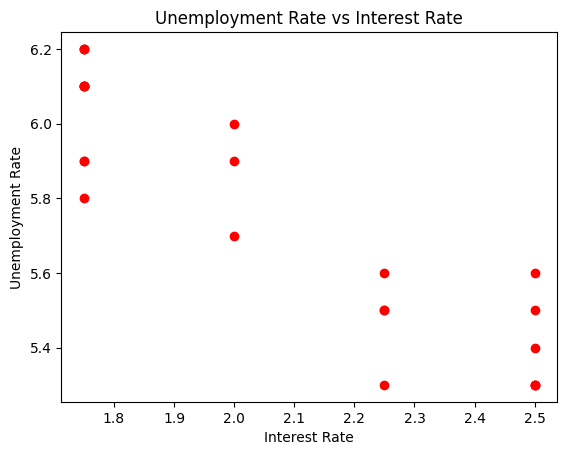

In [ ]:
## Visualize the datapoints more closely
plt.scatter(df_index["interest_rate"], df_index["unemployment_rate"], color="r")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate vs Interest Rate")
plt.show

In [ ]:
## Independent and dependent features
X

In [ ]:
## Independent and dependent features
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [ ]:
X.head()

,interest_rate,unemployment_rate
0,2.25,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [ ]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [ ]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

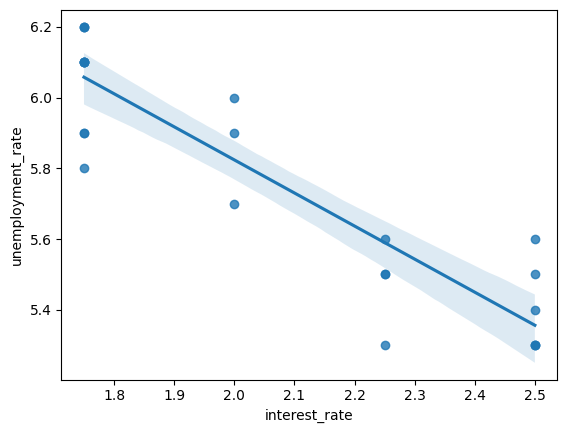

In [ ]:
sns.regplot(x=df_index["interest_rate"], y=df_index["unemployment_rate"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

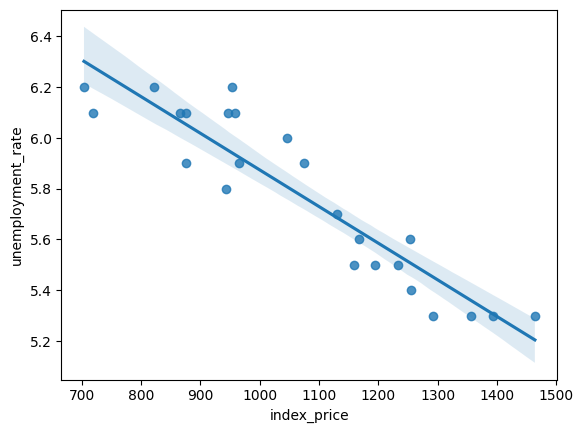

In [ ]:
sns.regplot(x=df_index["index_price"], y=df_index["unemployment_rate"])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[-1.03279556,  0.39413171],
       [-1.03279556,  0.98532928],
       [-1.03279556,  1.28092806],
       [ 0.51639778, -0.78826342],
       [ 1.29099445, -0.78826342],
       [-1.03279556,  0.98532928],
       [ 1.29099445, -1.08386221],
       [ 1.29099445, -1.37946099],
       [ 1.29099445, -0.49266464],
       [-1.03279556,  0.98532928],
       [ 0.51639778, -0.49266464],
       [ 0.51639778, -0.78826342],
       [-1.03279556,  0.98532928],
       [ 1.29099445, -1.37946099],
       [ 0.51639778, -1.37946099],
       [-1.03279556,  1.28092806],
       [-1.03279556,  0.98532928],
       [-0.25819889,  0.68973049]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
validation_score = cross_val_score(regression, X_train, y_train,
                                   scoring='neg_mean_squared_error',
                                   cv=3)

In [ ]:
np.mean(validation_score)

-7373.593506438822

In [ ]:
## Prediction
y_pred = regression.predict(X_test)

In [ ]:
y_pred

array([1032.23097945, 1148.28181154,  827.28302502, 1059.38468919,
       1001.35927315, 1442.12688832])

In [ ]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

8156.44310502187 79.03411795973643 90.31302843456126


In [ ]:
## R-sqaured
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.8261635874955673


In [ ]:
## Adjsted R-sqaured
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7102726458259454

## Assumptions

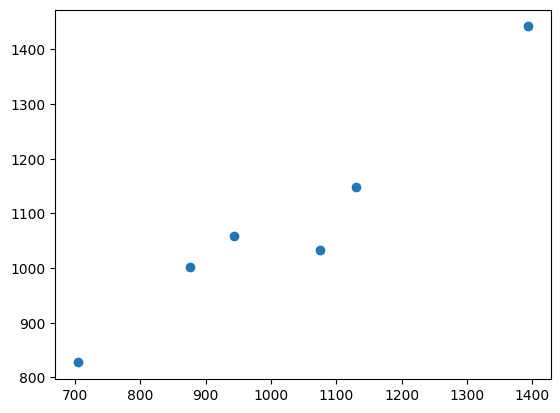

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
residuals = y_test - y_pred
print(residuals)

11     42.769021
10    -18.281812
22   -123.283025
14   -116.384689
20   -125.359273
1     -48.126888
Name: index_price, dtype: float64


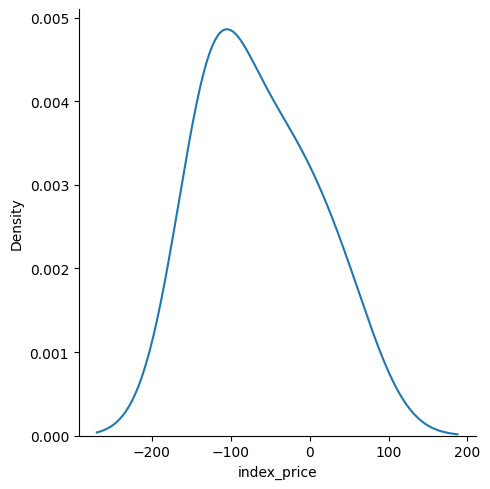

In [ ]:
## Plot this residuals
sns.displot(residuals, kind="kde")

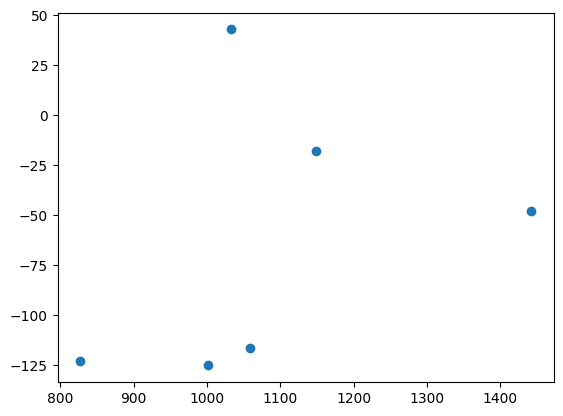

In [ ]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [ ]:
## OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.029
Model:                            OLS   Adj. R-squared (uncentered):             -0.092
Method:                 Least Squares   F-statistic:                             0.2394
Date:                Thu, 20 Jun 2024   Prob (F-statistic):                       0.790
Time:                        18:59:57   Log-Likelihood:                         -151.39
No. Observations:                  18   AIC:                                      306.8
Df Residuals:                      16   BIC:                                      308.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
print(regression.coef_)

[  32.94589515 -157.13356946]
